In [9]:
import nltk 
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from wordcloud import WordCloud

from textblob import TextBlob

import requests

import pandas as pd
import numpy as np


### Sentiment Analysis


A sentiment analysis was conducted on the winning songs of the years 2010-2019, 2021 and 2022. 
Polarity scores for each year were calculated and then plotted. 

An interesting pattern that was noticed was the shift in the sentiments from early in the decade to later in the decade. In the first half of the decade, all the winning songs showcased a somewhat linear but staggered increase in sentiment through the course of the song, which in most cases ended with a positive sentiment. However, in the past few years, from around 2018, more negative sentiments were seen in the winning songs with most of them ending on a negative note. 

In [10]:
def blob_sentiment(txt):
    sent = TextBlob(txt).sentiment.polarity
    return sent

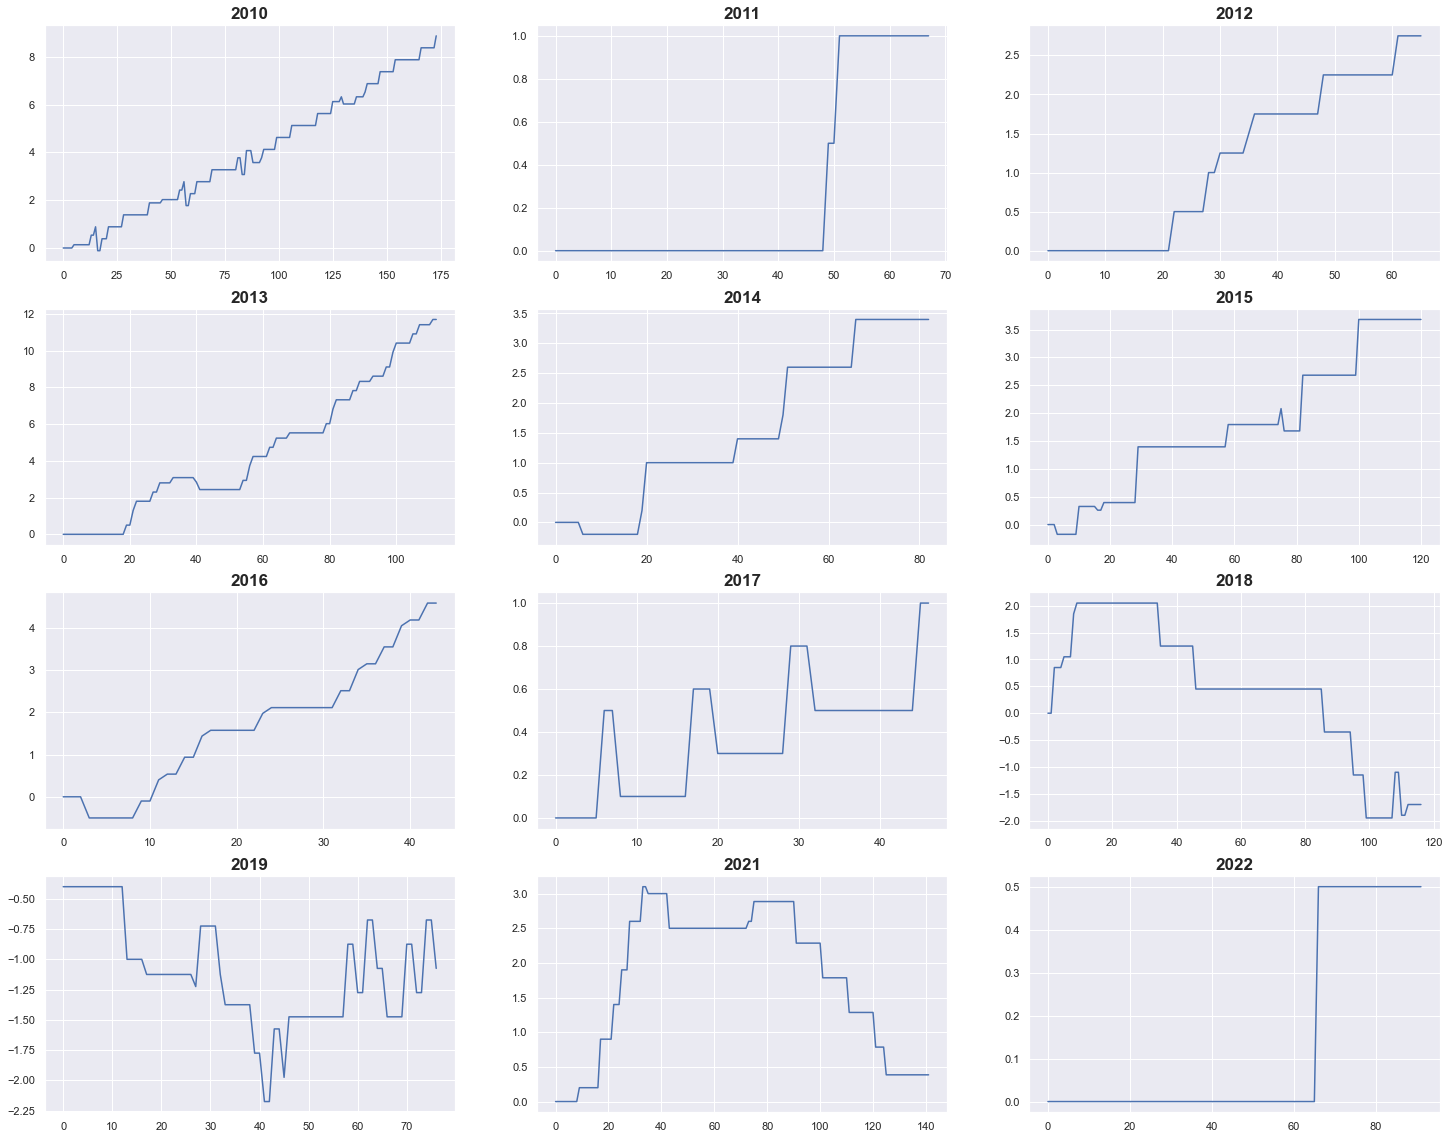

In [11]:
fig , ax = plt.subplots(4,3,figsize=(25,20))
grid_list = []

for row in range(0,4):
    for col in range(0,3):
        grid_list.append((row,col))
        
for y_id,year in enumerate(range(2010,2023)):
    if year==2020:
        continue
    else:
#         print(year)
        url="https://raw.githubusercontent.com/jackmheller/modernDataAnalytics/main/Lyrics%202/{}.txt".format(year)
        # read text file into pandas DataFrame
        df = requests.get(url)

        # display DataFrame
        text = df.text

        words = text.split()  
        alphabetic_only = [word for word in words if word.isalpha()]
        lower_case = [word.lower() for word in alphabetic_only]

        sw = stopwords.words('english')
        sw.append('oh') #adding the word 'oh' to the list of stopwords
        cleaned_words = [word for word in lower_case if word not in sw]

        df = pd.DataFrame(cleaned_words)
        df.columns = ['text']
        df['sentiment_blob'] = ''


        df['sentiment_blob'] = df['text'].apply(lambda x : blob_sentiment(x))

        if year in [2021,2022]:
            y_id-=1
        ax[grid_list[y_id]].plot(np.arange(0,len(df)),df['sentiment_blob'].cumsum(),label='Text Blob')
        ax[grid_list[y_id]].set_title(year,fontsize=17,fontweight='bold')


### Wordcloud Generation

A wordcloud was generated using the WordCloud function for the same set of winning songs through the years 2010-2019, 2020 and 2021. 
Since the analysis was done on song lyrics, the most frequently used words are usually the words found in either the title of the song or the chorus of the song. 
Another observation seen is that the word 'love' was commonly used in the early years of the decade. 


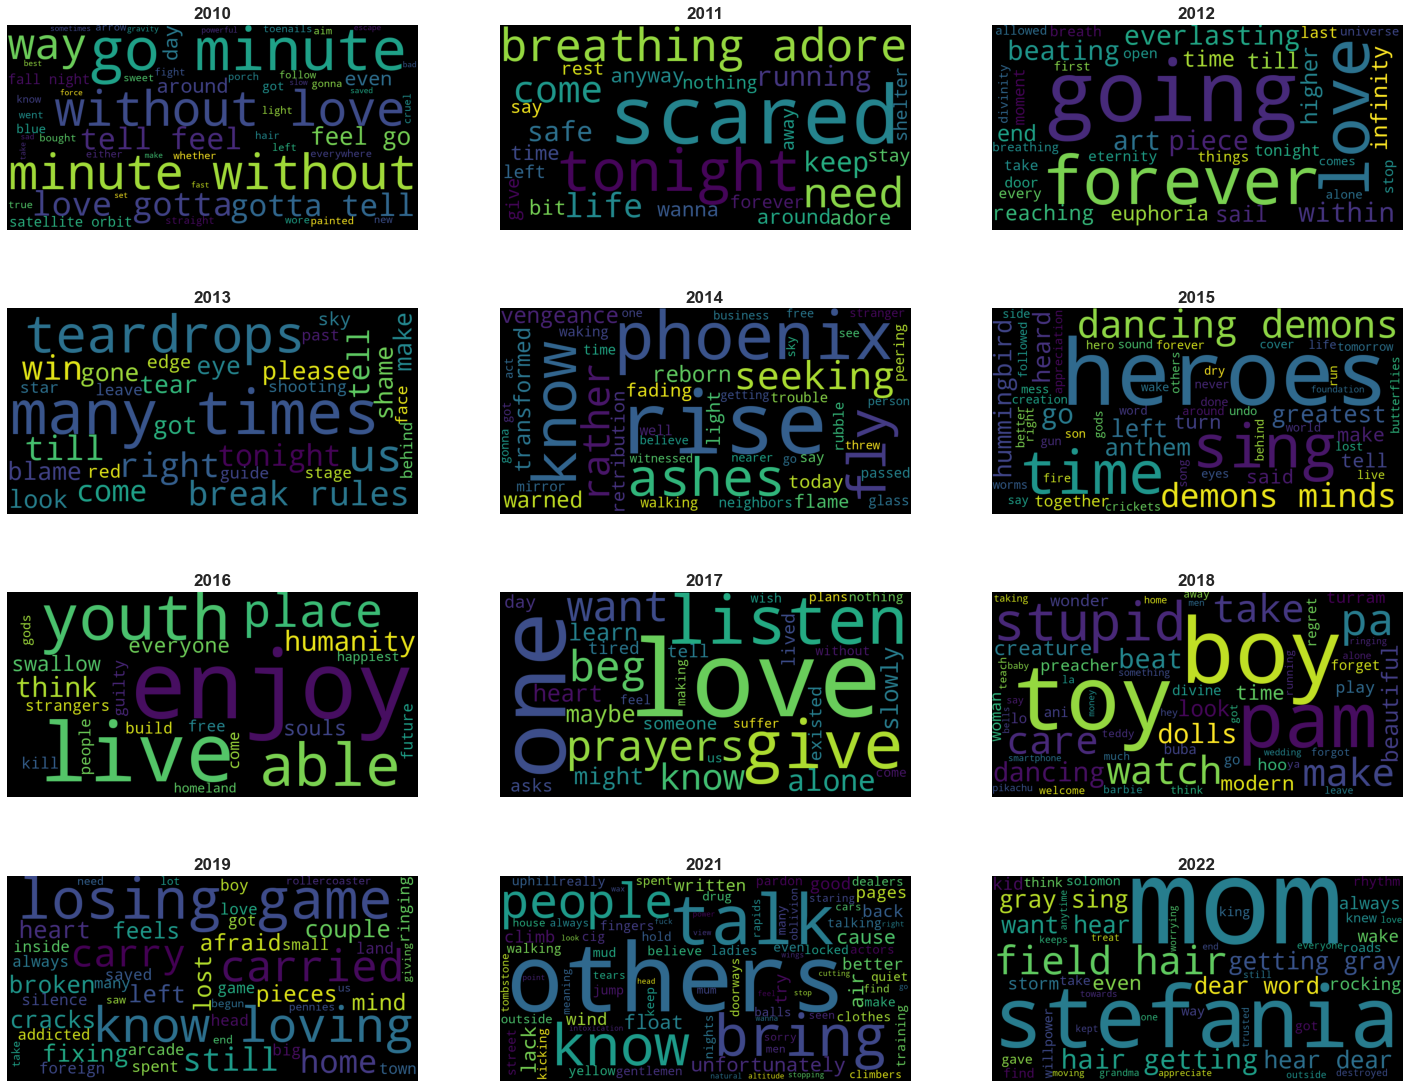

In [12]:
fig , ax = plt.subplots(4,3,figsize=(25,20))

grid_list = []

for row in range(0,4):
    for col in range(0,3):
        grid_list.append((row,col))
        
for y_id,year in enumerate(range(2010,2023)):
    if year==2020:
        continue
    else:
#         print(year)
        url="https://raw.githubusercontent.com/jackmheller/modernDataAnalytics/main/Lyrics%202/{}.txt".format(year)
        # read text file into pandas DataFrame
        df = requests.get(url)

        text = df.text

        words = text.split()
        alphabetic_only = [word for word in words if word.isalpha()]
        lower_case = [word.lower() for word in alphabetic_only]

        sw = stopwords.words('english')
        sw.append('oh') #adding the word 'oh' to the list of stopwords
        cleaned_words = [word for word in lower_case if word not in sw]

        if year in [2021,2022]:
            y_id-=1
        unique_string=(" ").join(cleaned_words)
        wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
        ax[grid_list[y_id]].imshow(wordcloud)
        ax[grid_list[y_id]].axis("off")
        ax[grid_list[y_id]].set_title(year,fontsize=17,fontweight='bold')
